# Synthetic data testing

In [88]:
import pandas as pd
import numpy as np

## Load Original data

Vou carregar os dados em features e sequenciados (neste so vou testar a act 13)

In [89]:
#ori_data_act_13_window_path = "data/sequences/data_train_act_13_windows.npy"
ori_data_act_12_window_path = "data/sequences/data_train_act_12_windows.npy"

#ori_data_act_13_windows = np.load(ori_data_act_13_window_path, allow_pickle=True)
ori_data_act_12_windows = np.load(ori_data_act_12_window_path, allow_pickle=True)

In [90]:
ori_data_train_features_path = "data/features/data_train_features.csv"

ori_data_train_features = pd.read_csv(ori_data_train_features_path)
ori_data_train_features_act_13 = ori_data_train_features[ori_data_train_features["activity"] == 13].reset_index(drop=True)


ori_data_test_features_path = "data/features/data_test_features.csv"
ori_data_test_features = pd.read_csv(ori_data_test_features_path)
ori_data_test_features_act_13 = ori_data_test_features[ori_data_test_features["activity"] == 13].reset_index(drop=True)

print(ori_data_train_features_act_13.shape)
ori_data_train_features_act_13.head(2)

(44787, 27)


,mean_x-accel,peak_x-accel,abs_dev_x-accel,std_x-accel,mean_y-accel,peak_y-accel,abs_dev_y-accel,std_y-accel,mean_z-accel,peak_z-accel,...,peak_y-gyro,abs_dev_y-gyro,std_y-gyro,mean_z-gyro,peak_z-gyro,abs_dev_z-gyro,std_z-gyro,resultant_accel,resultant_gyro,activity
0,-8.527766,230.800000,3.347428,4.018171,3.560281,141.707317,1.040396,1.427383,3.421837,132.272727,...,74.000000,0.379933,0.463670,-0.071606,204.285714,1.341232,1.616724,8.527766,1.025396,13
1,-8.887200,218.888889,3.361468,4.112741,3.765240,104.107143,1.146588,1.661449,3.226000,120.212766,...,81.643836,0.480195,0.581726,-0.261992,169.393939,1.575775,1.867163,8.887200,1.120242,13


## Load Syn data and process it

In [91]:
syn_data_raw_path_13 = "data/synthetic/rnvp_100000_act_13.csv"
syn_data_raw_path_12 = "data/synthetic/rnvp_100000_act_12.csv"

column_names = ["x-accel", "y-accel", "z-accel", "x-gyro", "y-gyro", "z-gyro"]

syn_data_act_13 = pd.read_csv(syn_data_raw_path_13, names=column_names, header=None)
syn_data_act_12 = pd.read_csv(syn_data_raw_path_13, names=column_names, header=None)

syn_data_act_13.head(2)

,x-accel,y-accel,z-accel,x-gyro,y-gyro,z-gyro
0,0.000000,1.000000,2.000000,3.00000,4.000000,5.00000
1,-7.712406,2.374578,0.199745,2.26598,-1.992698,-2.00686


## Process

In [92]:
from utilities.data_preprocessing import sequencing_data_by_one, extract_features_from_windows

In [93]:
seconds = 6
sampling_rate = 100
normalize = False
preselected_features = 1
band = (0.1, 3)

data_act_13_windows = sequencing_data_by_one(syn_data_act_13, seconds, sampling_rate, normalize)
data_act_12_windows = sequencing_data_by_one(syn_data_act_12, seconds, sampling_rate, normalize)
print(data_act_13_windows.shape)

syn_data_act_13_extracted_features = extract_features_from_windows(data_act_13_windows, column_names, preselected_features, sampling_rate, band)
syn_data_act_12_extracted_features = extract_features_from_windows(data_act_12_windows, column_names, preselected_features, sampling_rate, band)
syn_data_act_13_extracted_features["activity"] = 13
syn_data_act_12_extracted_features["activity"] = 12

(99401, 600, 6)
Extracting features from window 0 to 10000 of 99401
Extracting features from window 10000 to 20000 of 99401
Extracting features from window 20000 to 30000 of 99401
Extracting features from window 30000 to 40000 of 99401
Extracting features from window 40000 to 50000 of 99401
Extracting features from window 50000 to 60000 of 99401
Extracting features from window 60000 to 70000 of 99401
Extracting features from window 70000 to 80000 of 99401
Extracting features from window 80000 to 90000 of 99401
Extracting features from window 90000 to 100000 of 99401
Feature extraction completed! A dataframe of features was returned.
Extracting features from window 0 to 10000 of 99401
Extracting features from window 10000 to 20000 of 99401
Extracting features from window 20000 to 30000 of 99401
Extracting features from window 30000 to 40000 of 99401
Extracting features from window 40000 to 50000 of 99401
Extracting features from window 50000 to 60000 of 99401
Extracting features from wi

In [7]:
syn_data_act_13_extracted_features.head(2)

,mean_x-accel,peak_x-accel,abs_dev_x-accel,std_x-accel,mean_y-accel,peak_y-accel,abs_dev_y-accel,std_y-accel,mean_z-accel,peak_z-accel,...,peak_y-gyro,abs_dev_y-gyro,std_y-gyro,mean_z-gyro,peak_z-gyro,abs_dev_z-gyro,std_z-gyro,resultant_accel,resultant_gyro,activity
0,-6.441582,28.695652,4.223854,5.653166,3.949874,28.564593,2.941544,3.705992,3.841103,29.552239,...,28.883495,0.680222,0.903477,-0.187889,29.215686,1.021281,1.442630,7.079418,1.288430,13
1,-6.422865,30.357143,4.449264,6.304532,3.810392,30.937500,2.946551,3.769154,3.992666,30.101523,...,29.748744,0.702405,0.976285,-0.234697,28.605769,1.006551,1.325327,7.098098,1.240737,13


In [10]:
# Combine syn activities
syn_data_act_12_13_extracted_features = pd.concat([syn_data_act_12_extracted_features, syn_data_act_13_extracted_features], axis=0)
syn_data_act_12_13_extracted_features.head(2)

,mean_x-accel,peak_x-accel,abs_dev_x-accel,std_x-accel,mean_y-accel,peak_y-accel,abs_dev_y-accel,std_y-accel,mean_z-accel,peak_z-accel,...,peak_y-gyro,abs_dev_y-gyro,std_y-gyro,mean_z-gyro,peak_z-gyro,abs_dev_z-gyro,std_z-gyro,resultant_accel,resultant_gyro,activity
0,-6.741601,30.463918,4.127437,5.528187,3.629823,29.359606,2.778672,3.588926,3.947998,30.152284,...,31.489362,0.665223,0.922424,-0.216495,29.121951,0.942422,1.305880,7.221041,1.325777,13
1,-6.636442,29.408867,4.246579,6.496950,3.713997,30.000000,2.775213,3.489033,3.922236,30.000000,...,29.798995,0.676417,0.910147,-0.254770,30.512821,1.036715,1.397431,7.237939,1.285852,13


# Testing synthetic data

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

from utilities.synthetic_data_evaluation import report_results, discriminative_score_metrics, predictive_score_metrics, tSNE_Analysis

activities = [
    "lying",       #1
    "sitting",      #2
    "standing",     #3
    "running",      #5
    "asc stairs",   #12
    "desc stairs"   #13
] 
activities_12_13 = [
    "asc stairs",   #12
    "desc stairs"   #13
] 

## 1. Build a classifier with original data

__Train on Real__

In [75]:
rf_model_balanced = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")


rf_model_balanced.fit(ori_data_train_features.drop(["activity"], axis=1), ori_data_train_features["activity"])

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

__Test on Real__

In [82]:
y_hat_real = rf_model_balanced.predict(ori_data_test_features.drop(["activity"], axis=1))

save_path = "data/synthetic/real_on_real_balanced"

cmatrix, creport, acc = report_results(ori_data_test_features["activity"], y_hat_real, activities, save_path)

In [83]:
creport()

,precision,recall,f1-score,support
lying,0.821,0.972,0.890,23565.000
sitting,0.880,0.667,0.759,22323.000
standing,0.781,0.710,0.744,24560.000
running,1.000,0.916,0.956,15932.000
asc stairs,0.914,0.883,0.898,11083.000
desc stairs,0.602,0.934,0.732,9055.000
Accuracy,0.827,0.827,0.827,0.827
Macro avg,0.833,0.847,0.830,106518.000
Weighted avg,0.842,0.827,0.826,106518.000


__Test on syn__

Neste modelo só funciona quando o test tem o mesmo número de labels do train

In [64]:

y_hat_syn = rf_model.predict(syn_data_act_12_13_extracted_features.drop(["activity"], axis=1))

save_path = "data/synthetic/real_on_syn"

cmatrix, creport, acc = report_results(syn_data_act_12_13_extracted_features["activity"], y_hat_syn, activities_12_13, save_path)

__Train on real + synthetic__

In [78]:
# Combine datasets
combined_data = pd.concat([ori_data_train_features, syn_data_act_12_13_extracted_features]).reset_index(drop=True)
combined_data = combined_data.sample(frac = 1)
combined_X_train = combined_data.drop("activity", axis=1)
combined_y_train = combined_data["activity"]

rf_model_combined = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")

rf_model_combined.fit(combined_X_train, combined_y_train)



RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

__Test on real__

In [84]:
y_hat_combined_real = rf_model_combined.predict(ori_data_test_features.drop(["activity"], axis=1))

save_path = "data/synthetic/rnvp_12_13_combined_on_real_balanced"

cmatrix, creport, acc = report_results(ori_data_test_features["activity"], y_hat_combined_real, activities, save_path)

In [85]:
creport()

,precision,recall,f1-score,support
lying,0.774,0.966,0.860,23565.000
sitting,0.861,0.616,0.718,22323.000
standing,0.798,0.887,0.840,24560.000
running,1.000,0.934,0.966,15932.000
asc stairs,0.938,0.881,0.909,11083.000
desc stairs,0.915,0.866,0.890,9055.000
Accuracy,0.852,0.852,0.852,0.852
Macro avg,0.881,0.858,0.864,106518.000
Weighted avg,0.861,0.852,0.849,106518.000


A atividade de "asc stairs" melhorou por 0.11%;

A atividade "desc stairs" melhorou por 1.58%

## 2. Visualize distribution of data through reduction

/opt/anaconda3/envs/ml_env_v12/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 89574 samples in 0.018s...
[t-SNE] Computed neighbors for 89574 samples in 285.738s...
[t-SNE] Computed conditional probabilities for sample 1000 / 89574
[t-SNE] Computed conditional probabilities for sample 2000 / 89574
[t-SNE] Computed conditional probabilities for sample 3000 / 89574
[t-SNE] Computed conditional probabilities for sample 4000 / 89574
[t-SNE] Computed conditional probabilities for sample 5000 / 89574
[t-SNE] Computed conditional probabilities for sample 6000 / 89574
[t-SNE] Computed conditional probabilities for sample 7000 / 89574
[t-SNE] Computed conditional probabilities for sample 8000 / 89574
[t-SNE] Computed conditional probabilities for sample 9000 / 89574
[t-SNE] Computed conditional probabilities for sample 10000 / 89574
[t-SNE] Computed conditional probabilities for sample 11000 / 89574
[t-SNE] Computed conditional probabilities for sample 12000 / 89574
[t-SNE] Computed conditional probabilities for 

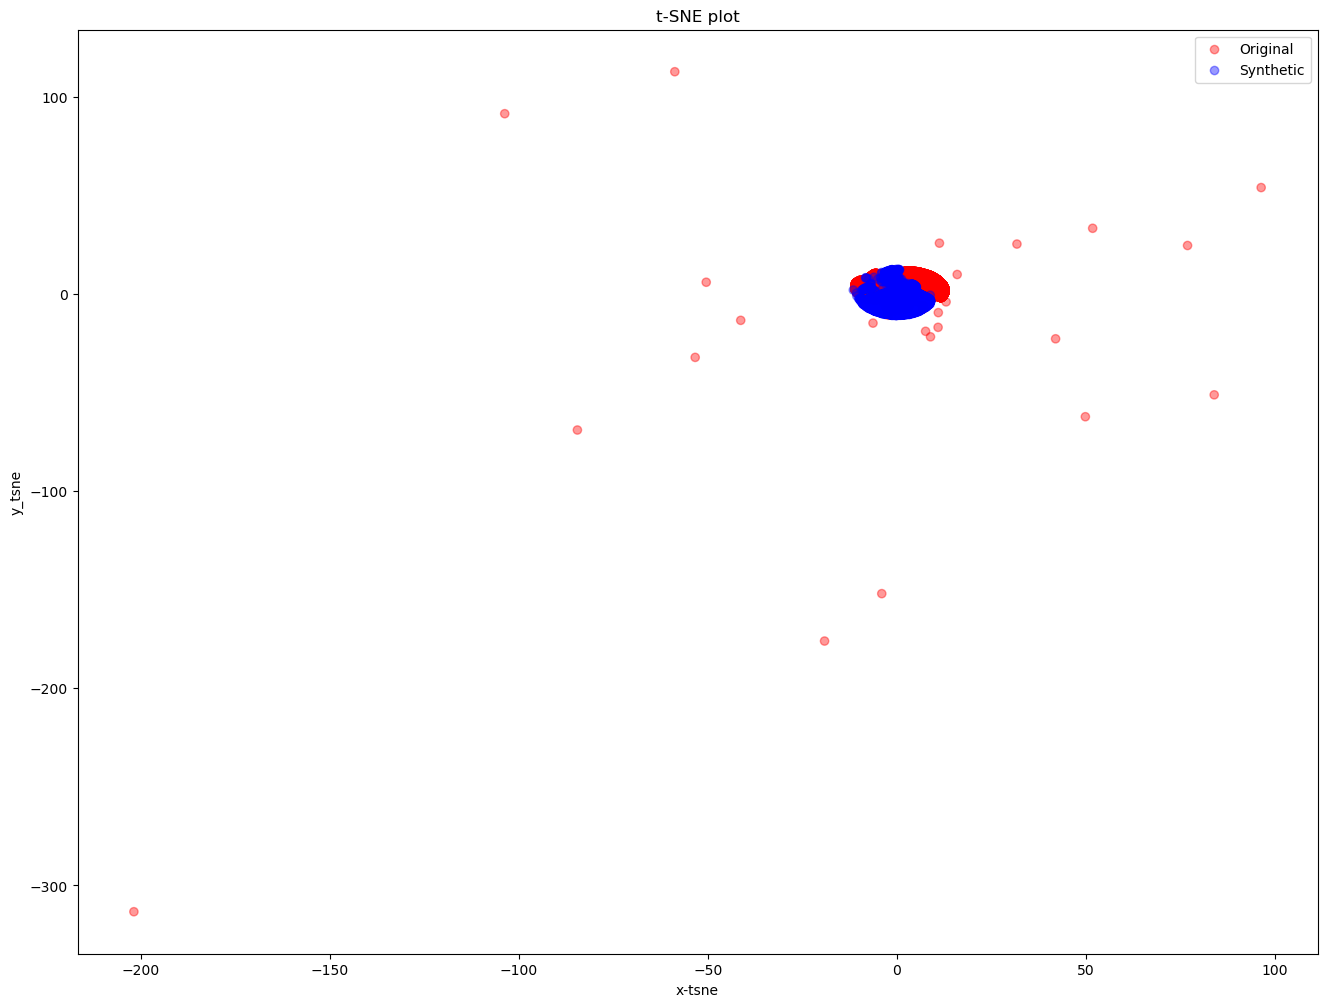

In [ ]:
tSNE_Analysis(ori_data_act_13_windows, data_act_13_windows, save_path="data/synthetic/act_13_", size="md", alpha=0.4)

/opt/anaconda3/envs/ml_env_v12/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 86042 samples in 0.021s...
[t-SNE] Computed neighbors for 86042 samples in 203.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86042
[t-SNE] Computed conditional probabilities for sample 2000 / 86042
[t-SNE] Computed conditional probabilities for sample 3000 / 86042
[t-SNE] Computed conditional probabilities for sample 4000 / 86042
[t-SNE] Computed conditional probabilities for sample 5000 / 86042
[t-SNE] Computed conditional probabilities for sample 6000 / 86042
[t-SNE] Computed conditional probabilities for sample 7000 / 86042
[t-SNE] Computed conditional probabilities for sample 8000 / 86042
[t-SNE] Computed conditional probabilities for sample 9000 / 86042
[t-SNE] Computed conditional probabilities for sample 10000 / 86042
[t-SNE] Computed conditional probabilities for sample 11000 / 86042
[t-SNE] Computed conditional probabilities for sample 12000 / 86042
[t-SNE] Computed conditional probabilities for 

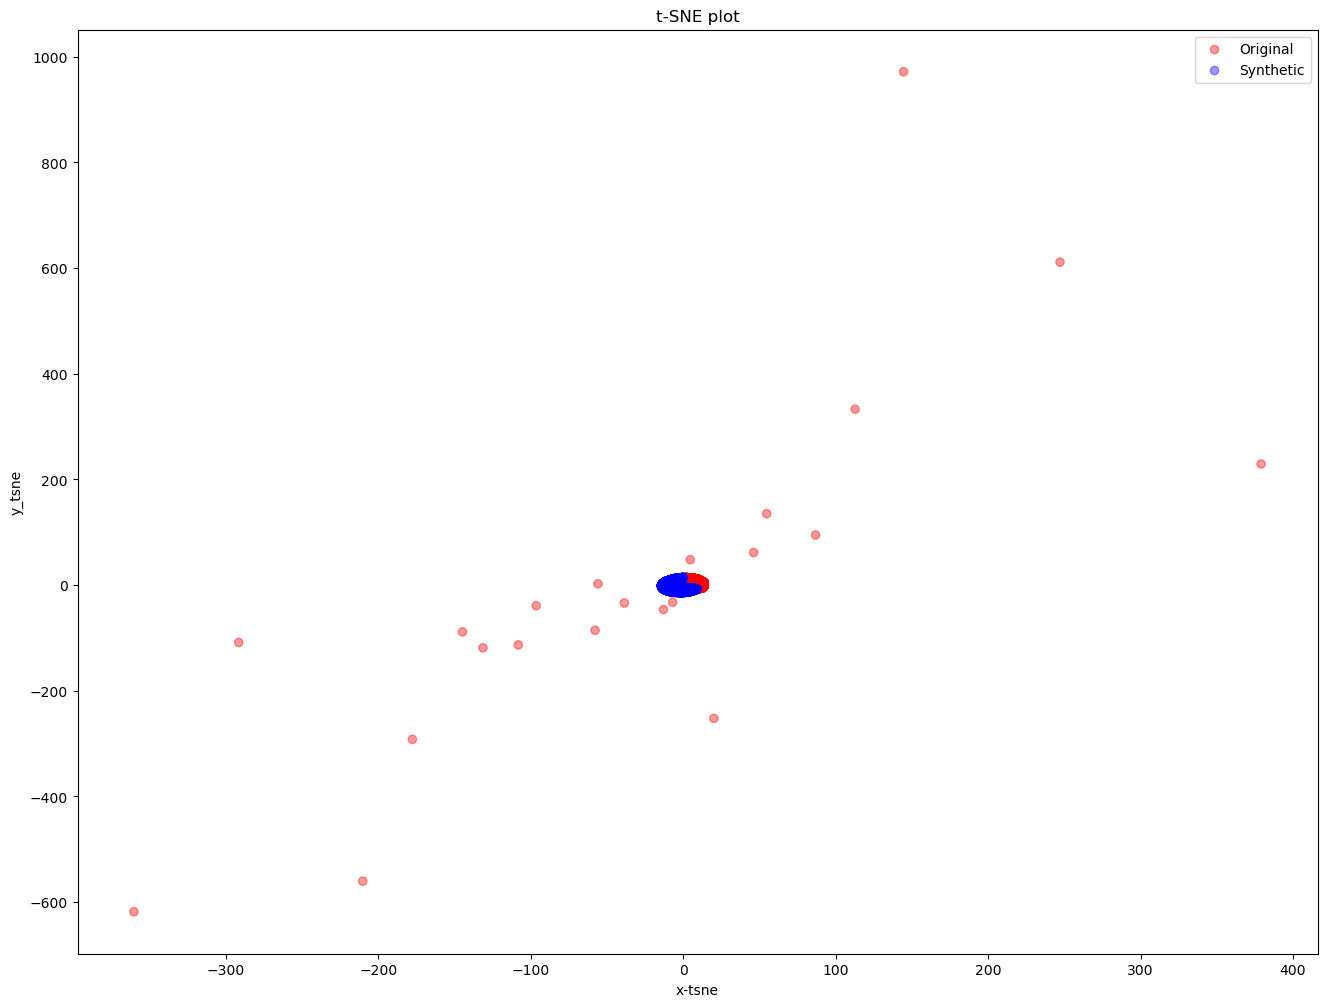

In [87]:
tSNE_Analysis(ori_data_act_12_windows, data_act_12_windows, save_path="data/synthetic/act_12_", size="md", alpha=0.4)